In [170]:
import pandas as pd

In [171]:
# data ingestion step 
data = pd.read_csv("data/finalTrain.csv")

In [172]:
data_copy = data.copy()

In [173]:
def describe_dataset(df) :

    unique_values = []
    n_unique_values = []

    col = ['Data_type', 'Missing_value_Count', 'Unique_Values', 'N_unique'] 
    DSC_df = pd.DataFrame(columns=col)
    DSC_df["Missing_value_count"] = df.isnull().sum()
    DSC_df["Data_type"] = df.dtypes

    for i in data :
        unique_values.append(data[i].unique())
        n_unique_values.append(len(data[i].unique()))
    
    DSC_df["Unique_Values"] = unique_values 
    DSC_df["N_unique"] = n_unique_values

    DSC_df.drop("Missing_value_Count" , axis = 1 , inplace = True )

    return DSC_df

In [174]:
# getting the discription of the dataset 
describe_dataset(data_copy)

,Data_type,Unique_Values,N_unique,Missing_value_count
ID,object,"[0xcdcd, 0xd987, 0x2784, 0xc8b6, 0xdb64, 0x3af...",45584,0
Delivery_person_ID,object,"[DEHRES17DEL01, KOCRES16DEL01, PUNERES13DEL03,...",1320,0
Delivery_person_Age,float64,"[36.0, 21.0, 23.0, 34.0, 24.0, 29.0, 35.0, 33....",23,1854
Delivery_person_Ratings,float64,"[4.2, 4.7, 4.3, 4.5, 4.0, 4.9, 4.1, 5.0, 4.8, ...",29,1908
Restaurant_latitude,float64,"[30.327968, 10.003064, 18.56245, 30.899584, 26...",657,0
Restaurant_longitude,float64,"[78.046106, 76.307589, 73.916619, 75.809346, 8...",518,0
Delivery_location_latitude,float64,"[30.397968, 10.043064, 18.65245, 30.919584, 26...",4373,0
Delivery_location_longitude,float64,"[78.116106, 76.347589, 74.006619, 75.829346, 8...",4373,0
Order_Date,object,"[12-02-2022, 13-02-2022, 04-03-2022, 14-02-202...",44,0
Time_Orderd,object,"[21:55, 14:55, 17:30, 09:20, 19:50, 20:25, 20:...",177,1731


In [175]:
def Null_percent(df) :
    null_count = df.isnull().sum().sort_values(ascending=False)
    null_percent = (null_count * 100) / df.shape[0]

    return null_percent

In [176]:
# Getting the null percent of every column
Null_percent(data_copy)

Delivery_person_Ratings        4.185679
Delivery_person_Age            4.067217
Time_Orderd                    3.797385
City                           2.632503
multiple_deliveries            2.178396
Weather_conditions             1.351351
Road_traffic_density           1.318445
Festival                       0.500176
ID                             0.000000
Type_of_vehicle                0.000000
Type_of_order                  0.000000
Vehicle_condition              0.000000
Time_Order_picked              0.000000
Delivery_person_ID             0.000000
Order_Date                     0.000000
Delivery_location_longitude    0.000000
Delivery_location_latitude     0.000000
Restaurant_longitude           0.000000
Restaurant_latitude            0.000000
Time_taken (min)               0.000000
dtype: float64

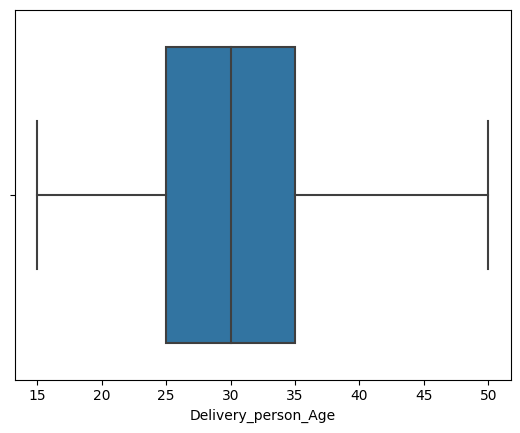

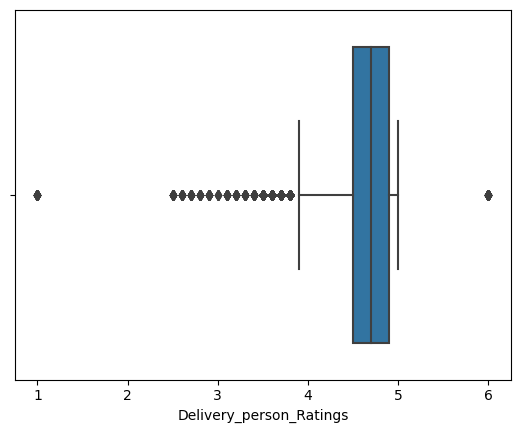

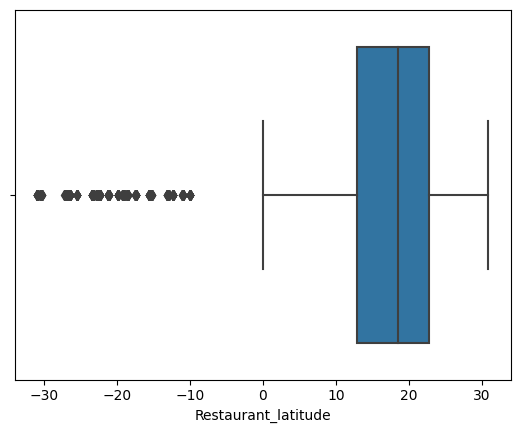

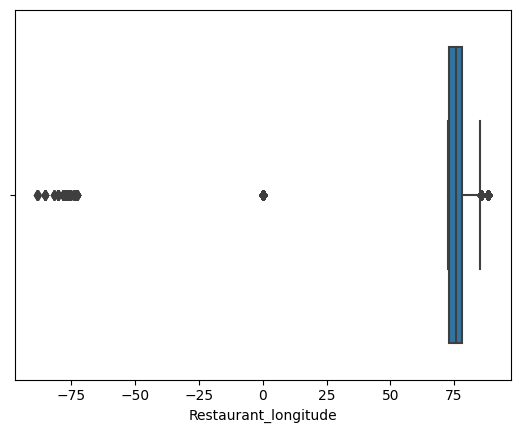

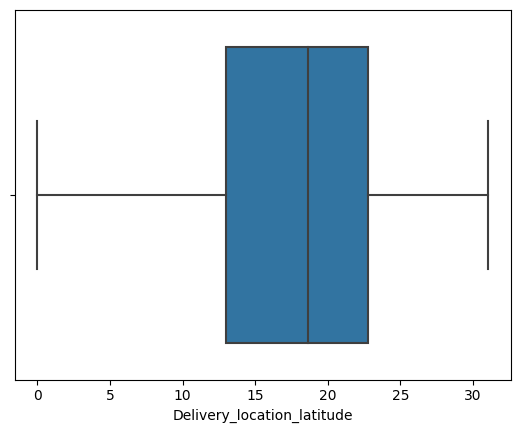

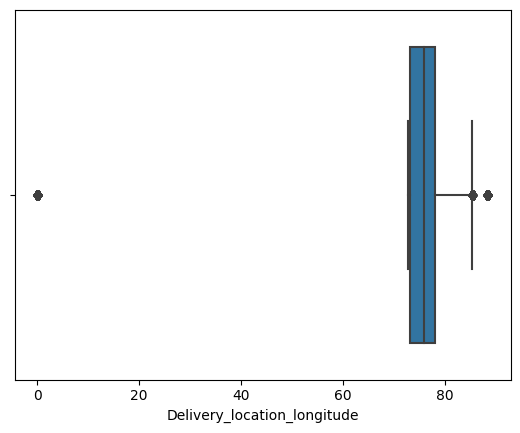

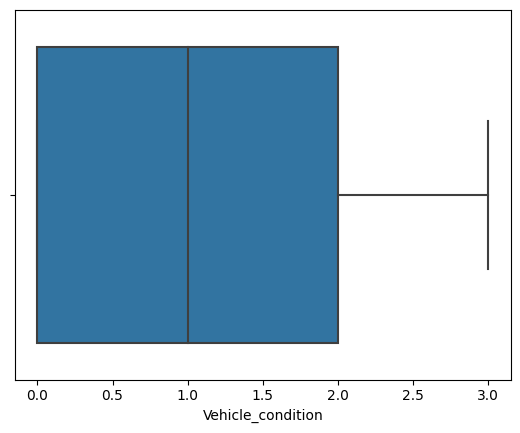

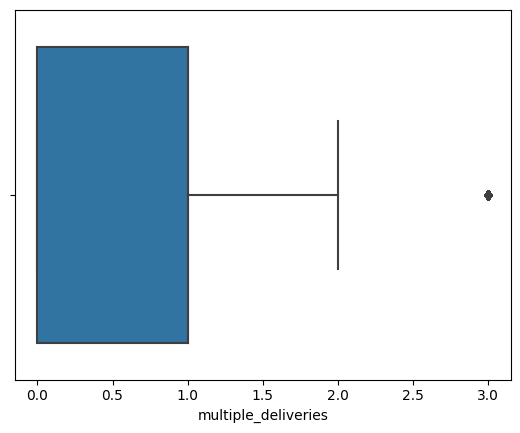

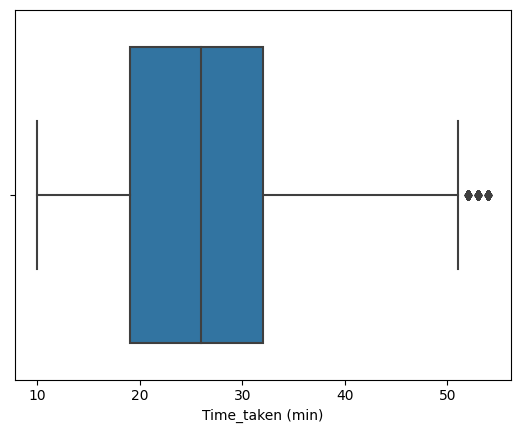

In [177]:
# To identify outliers 
import seaborn as sns
import matplotlib.pyplot as plt


for i in data_copy :
    if data_copy[i].dtype != "O" :
        sns.boxplot(x=data_copy[i])
        plt.show()

In [178]:
# Here we are good to go 
# let's drop the ID column and Delivery_Person ID column 

data_copy.drop("ID", axis = 1 , inplace=True)


In [179]:
data_copy.drop("Delivery_person_ID", axis = 1 , inplace=True)

In [180]:
data_copy.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [181]:
# Extracting the orderd_hour and orderd_min from the time_orderd column
data_copy['Orderd_hour'] = data_copy['Time_Orderd'].str.split(':').str[0]
data_copy['Orderd_min'] = data_copy['Time_Orderd'].str.split(':').str[1]

In [182]:
data_copy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Orderd_hour,Orderd_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,30
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50


In [183]:
# since we have extracted the Orderd_hour and Orderd_min so 
# we don't need the Time_Orderd col so we drop it 

data_copy.drop("Time_Orderd" , axis = 1 , inplace = True )

In [184]:
data_copy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Orderd_hour,Orderd_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,30
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50


In [185]:
data_copy['Orderd_hour']

0        21
1        14
2        17
3        09
4        19
         ..
45579    11
45580    19
45581    23
45582    13
45583    17
Name: Orderd_hour, Length: 45584, dtype: object

In [186]:
data_copy['Orderd_min']

0        55
1        55
2        30
3        20
4        50
         ..
45579    35
45580    55
45581    50
45582    35
45583    10
Name: Orderd_min, Length: 45584, dtype: object

In [187]:
# ok let's extract the picked_hour and picked_min from the Time_Order_Picked col 

data_copy['picked_hour'] = data_copy['Time_Order_picked'].str.split(':').str[0]
data_copy['picked_min'] = data_copy['Time_Order_picked'].str.split(':').str[1]

In [188]:
# since we have extracted the picked_hour and picked_min so 
# we don't need the Time_Orderd_picked col so we drop it 
data_copy.drop("Time_Order_picked" ,axis =1 , inplace = True )

In [189]:
data_copy.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Orderd_hour,Orderd_min,picked_hour,picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,15,05
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,30,17,40
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20,09,30
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,20,05


In [190]:
data_copy[['Orderd_hour' , 'Orderd_min' , 'picked_hour', 'picked_min']].head()

,Orderd_hour,Orderd_min,picked_hour,picked_min
0,21,55,22,10
1,14,55,15,05
2,17,30,17,40
3,09,20,09,30
4,19,50,20,05


In [191]:
data_copy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Orderd_hour,Orderd_min,picked_hour,picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,15,05
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,30,17,40
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,09,20,09,30
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,20,05


In [192]:
# Converting the data type of the column 
data_copy['Order_Date'] = pd.to_datetime(data_copy['Order_Date'], format='%d-%m-%Y')

In [193]:
# Extracting the values day , month , year from date col 

data_copy["Orderd_Day"] = data_copy["Order_Date"].dt.day
data_copy["Orderd_Month"] = data_copy["Order_Date"].dt.month
data_copy["Orderd_Year"] = data_copy["Order_Date"].dt.year

In [194]:
# once we have extracted values of day , month , year we 
# don't need the column called Order_date so we drop it 

data_copy.drop("Order_Date" , axis = 1 , inplace = True )

In [195]:
data_copy.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken (min),Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,No,Metropolitian,46,21,55,22,10,12,2,2022
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,No,Metropolitian,23,14,55,15,05,13,2,2022
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,No,Metropolitian,21,17,30,17,40,4,3,2022


In [196]:
# Creating the new independent variable 
data_copy['Delivery_Time(min)'] = data_copy['Time_taken (min)']

In [197]:
data_copy.head(4)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,City,Time_taken (min),Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year,Delivery_Time(min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,Metropolitian,46,21,55,22,10,12,2,2022,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,Metropolitian,23,14,55,15,05,13,2,2022,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,Metropolitian,21,17,30,17,40,4,3,2022,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,Metropolitian,20,09,20,09,30,13,2,2022,20


In [198]:
# We have created the new independent col so we don't need Time_taken(min) col so we 
# are going to drop it
data_copy.drop("Time_taken (min)" , axis = 1 , inplace=True)

In [199]:
data_copy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year,Delivery_Time(min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,No,Metropolitian,21,55,22,10,12,2,2022,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,No,Metropolitian,14,55,15,05,13,2,2022,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,No,Metropolitian,17,30,17,40,4,3,2022,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,No,Metropolitian,09,20,09,30,13,2,2022,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,No,Metropolitian,19,50,20,05,14,2,2022,41


In [200]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

In [201]:
data_copy['Orderd_min'] = data_copy['Orderd_min'].astype("Int64")

In [205]:
# Rounding the values to convert it into the integer 
data_copy['picked_hour'] = data_copy['picked_hour'].astype(float).round()


In [206]:
data_copy['picked_hour'] = data_copy['picked_hour'].astype(int)

In [207]:
data_copy['picked_min'] = data_copy['picked_min'].astype(float)

In [208]:
# getting the mean to fill null values 
avg_min = data_copy['picked_min'].mean()

In [209]:
# filling the null values in picked_min col with the mean of that col 
data_copy['picked_min'] = data_copy['picked_min'].fillna(avg_min)

In [210]:
data_copy['picked_min'] = data_copy['picked_min'].astype(int)

In [211]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

In [212]:
data_copy['Orderd_hour'] = data_copy['Orderd_hour'].astype(float).round()

In [213]:
# getting the mean of Orderd_hour 
avg_orderd_hour = data_copy["Orderd_hour"].mean()

In [214]:
# filling null values in the Orderd_hour col using the mean of that col 
data_copy["Orderd_hour"].fillna(avg_orderd_hour,inplace = True)

In [215]:
# Now we don't have any null value in the col 
data_copy['Orderd_hour'].isnull().sum()

0

In [216]:
# let's convert the datatype of the column 
data_copy['Orderd_hour'] = data_copy['Orderd_hour'].astype(int)

In [217]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

In [218]:
# getting the mean of multiple_delivery col 
avg_multiple_delivery = data_copy['multiple_deliveries'].mean().round(2)

In [219]:
# filling the null values in multiple_deliveries col using mean of that col 
data_copy['multiple_deliveries'].fillna(avg_multiple_delivery,inplace=True)

In [220]:
# Changing the datatype of the multiple_deliveries col 
data_copy['multiple_deliveries'] = data_copy['multiple_deliveries'].astype(int)

In [221]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          45584 non-null  int32  
 12  Festival                     45356 non-null  object 
 13  City            

In [222]:
for col_name in data_copy.columns:
    if data_copy[col_name].dtype == int or data_copy[col_name].dtype == float:
        print(col_name, "---> mean of col : " , "==", data_copy[col_name].mean())


Delivery_person_Age ---> mean of col :  == 29.566910587697233
Delivery_person_Ratings ---> mean of col :  == 4.6337736972250205
Restaurant_latitude ---> mean of col :  == 17.017948396389087
Restaurant_longitude ---> mean of col :  == 70.22968394987276
Delivery_location_latitude ---> mean of col :  == 17.465479840514217
Delivery_location_longitude ---> mean of col :  == 70.8441609078624
multiple_deliveries ---> mean of col :  == 0.7284134784134784
Orderd_hour ---> mean of col :  == 16.019348894348894
picked_hour ---> mean of col :  == 16.237495612495614
picked_min ---> mean of col :  == 31.410187785187784
Orderd_Day ---> mean of col :  == 13.810920498420499
Orderd_Month ---> mean of col :  == 2.9806730431730433
Orderd_Year ---> mean of col :  == 2022.0


In [223]:
data_copy['Orderd_min'] = data_copy['Orderd_min'].astype(float).round()

In [224]:
# let's fill all the numerical null values 
def fill_null_numerical(data_copy):
    for i in data_copy :
        if data_copy[i].isnull().sum() > 0 and data_copy[i].dtype != "O" :
            data_copy[i].fillna(data_copy[i].mean().round(2) , inplace = True )
    return data_copy

In [225]:
fill_null_numerical(data_copy).head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year,Delivery_Time(min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,No,Metropolitian,21,55.0,22,10,12,2,2022,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,No,Metropolitian,14,55.0,15,5,13,2,2022,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,No,Metropolitian,17,30.0,17,40,4,3,2022,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,No,Metropolitian,9,20.0,9,30,13,2,2022,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,No,Metropolitian,19,50.0,20,5,14,2,2022,41


In [226]:
# ok let's fill all the categorical null values in each column
data_copy.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                        228
City                           1200
Orderd_hour                       0
Orderd_min                        0
picked_hour                       0
picked_min                        0
Orderd_Day                        0
Orderd_Month                      0
Orderd_Year                       0
Delivery_Time(min)                0
dtype: int64

In [227]:
# to fill the categorical null values 
def fill_categorical(data_copy):
    for i in data_copy:
        if data_copy[i].isnull().sum() > 0 and data_copy[i].dtype == "O":
            mode_value = data_copy[i].mode().iloc[0]
            data_copy[i].fillna(mode_value, inplace=True)
    return data_copy


In [228]:
fill_categorical(data_copy).head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year,Delivery_Time(min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,No,Metropolitian,21,55.0,22,10,12,2,2022,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,No,Metropolitian,14,55.0,15,5,13,2,2022,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,No,Metropolitian,17,30.0,17,40,4,3,2022,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,No,Metropolitian,9,20.0,9,30,13,2,2022,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,No,Metropolitian,19,50.0,20,5,14,2,2022,41


In [229]:
# Now we don't have null values in our dataset 
data_copy.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Orderd_hour                    0
Orderd_min                     0
picked_hour                    0
picked_min                     0
Orderd_Day                     0
Orderd_Month                   0
Orderd_Year                    0
Delivery_Time(min)             0
dtype: int64

In [230]:
data_copy['Orderd_min'] = data_copy['Orderd_min'].astype(int).round()

In [231]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45584 non-null  float64
 1   Delivery_person_Ratings      45584 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           45584 non-null  object 
 7   Road_traffic_density         45584 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          45584 non-null  int32  
 12  Festival                     45584 non-null  object 
 13  City            

In [232]:
# ok let's plot the one another time all the features
numerical_col = [x for x in data_copy if data_copy[x].dtype != "O"]
categorical_col = [x for x in data_copy if data_copy[x].dtype == "O"] 

In [233]:
numerical_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Orderd_hour',
 'Orderd_min',
 'picked_hour',
 'picked_min',
 'Orderd_Day',
 'Orderd_Month',
 'Orderd_Year',
 'Delivery_Time(min)']

In [235]:
categorical_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

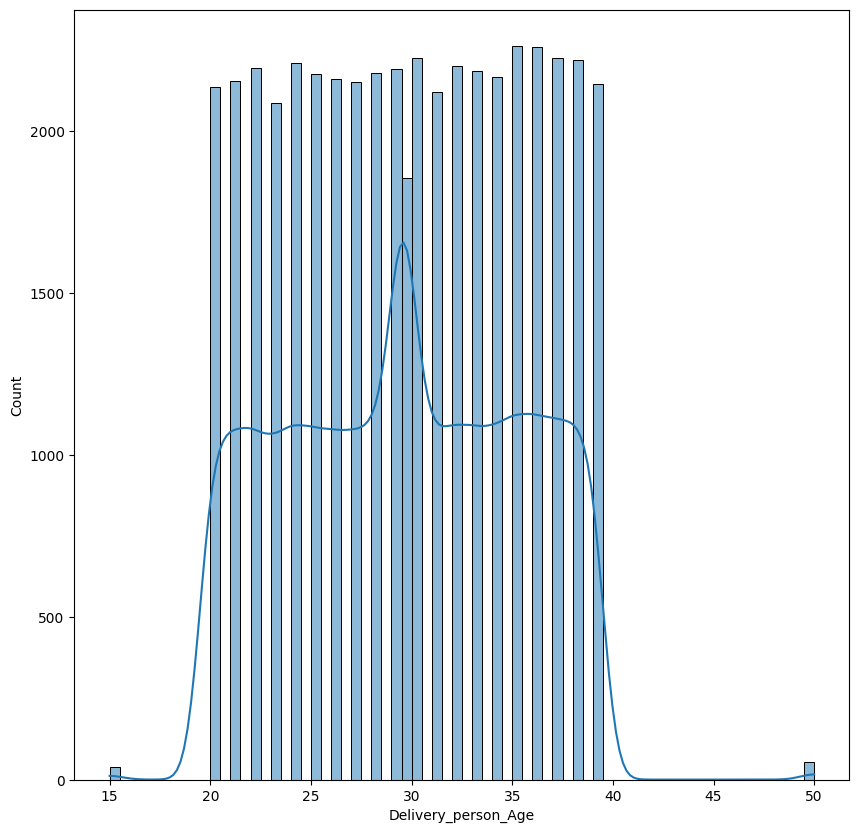

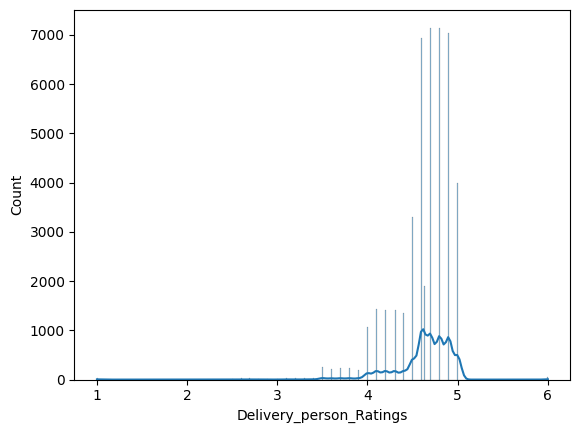

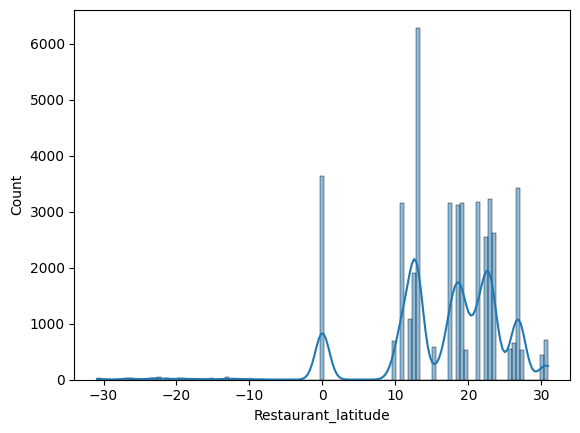

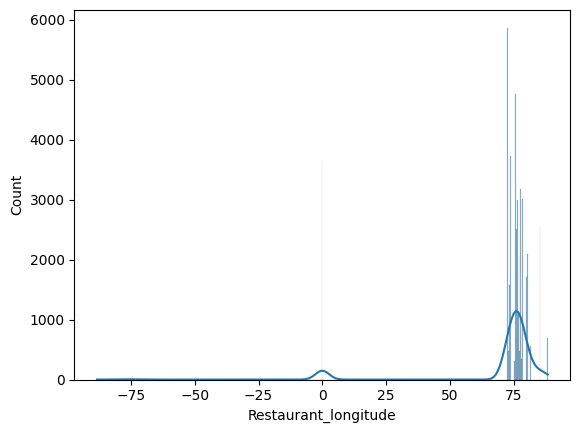

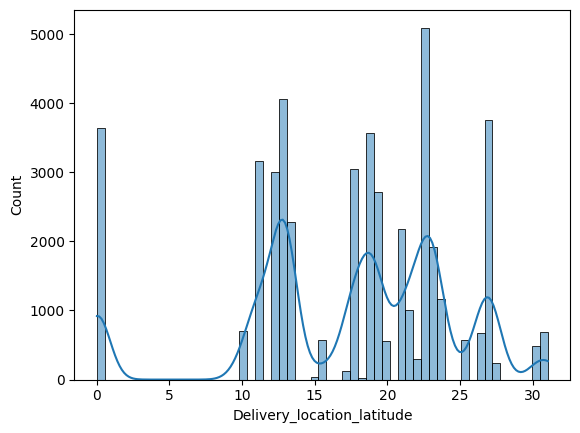

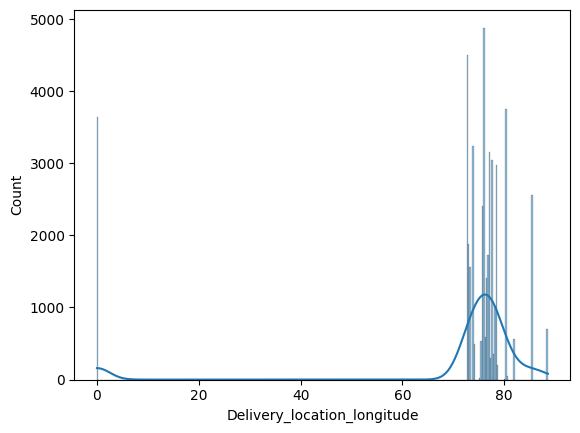

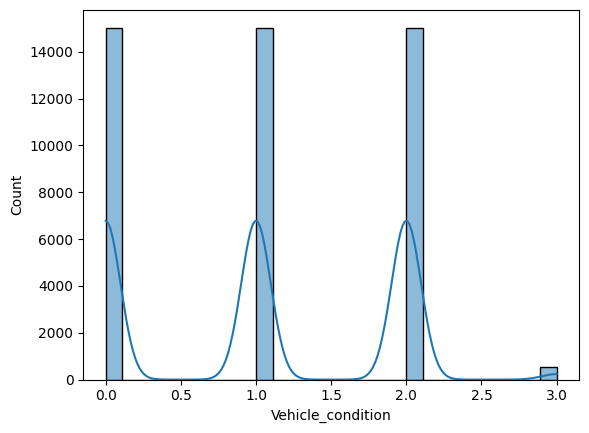

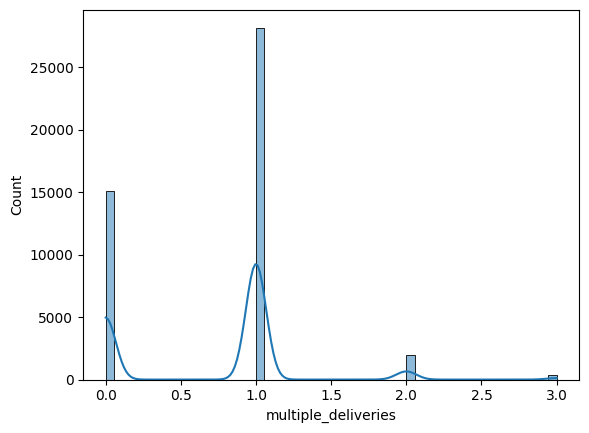

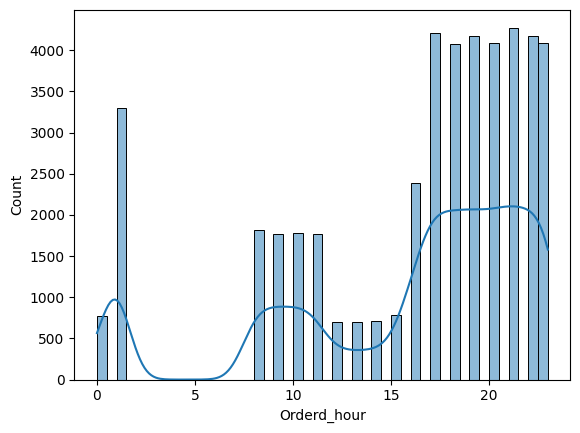

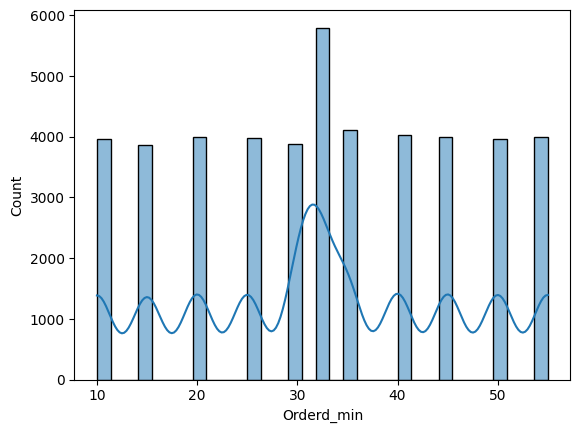

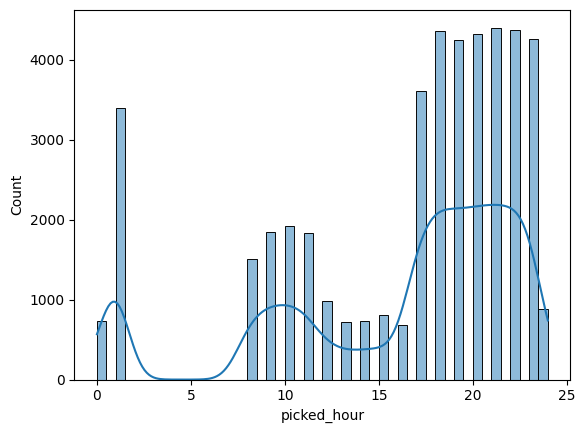

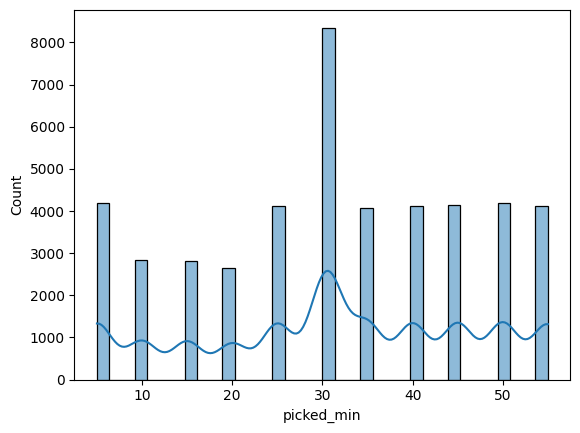

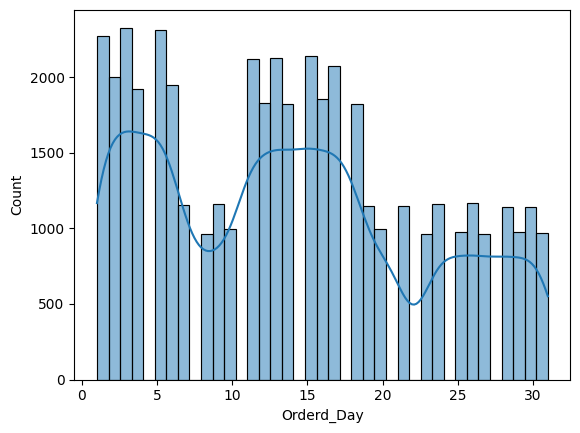

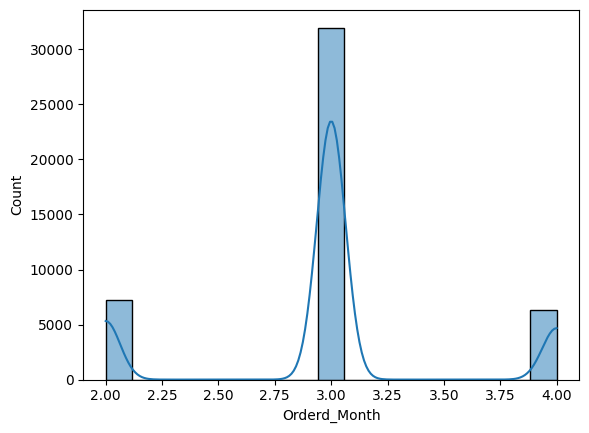

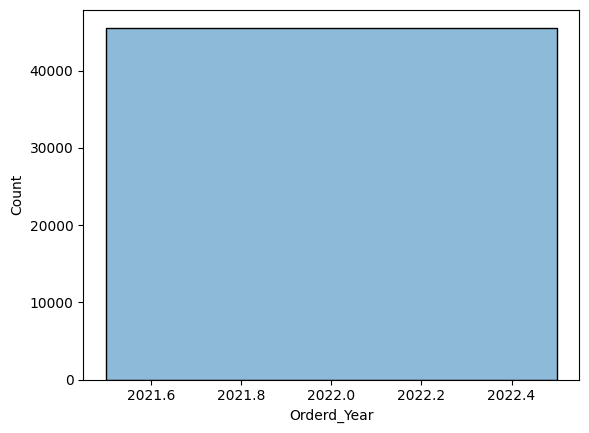

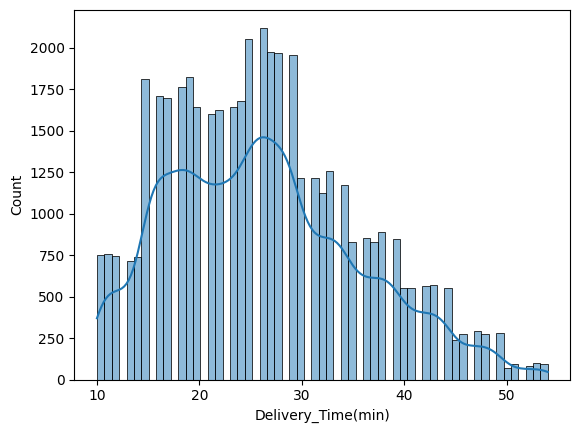

In [236]:
# Checking the distribution of the datasets 
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))

for i in numerical_col :
    sns.histplot(data = data_copy , x = i , kde = True )
    print("\n")
    plt.show()

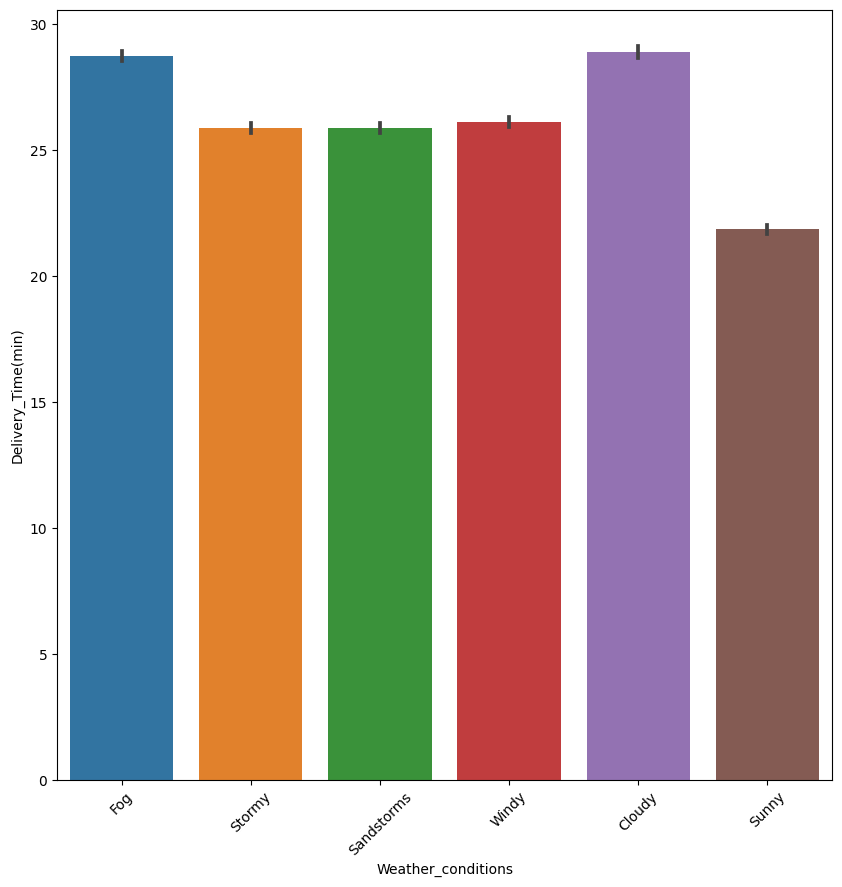

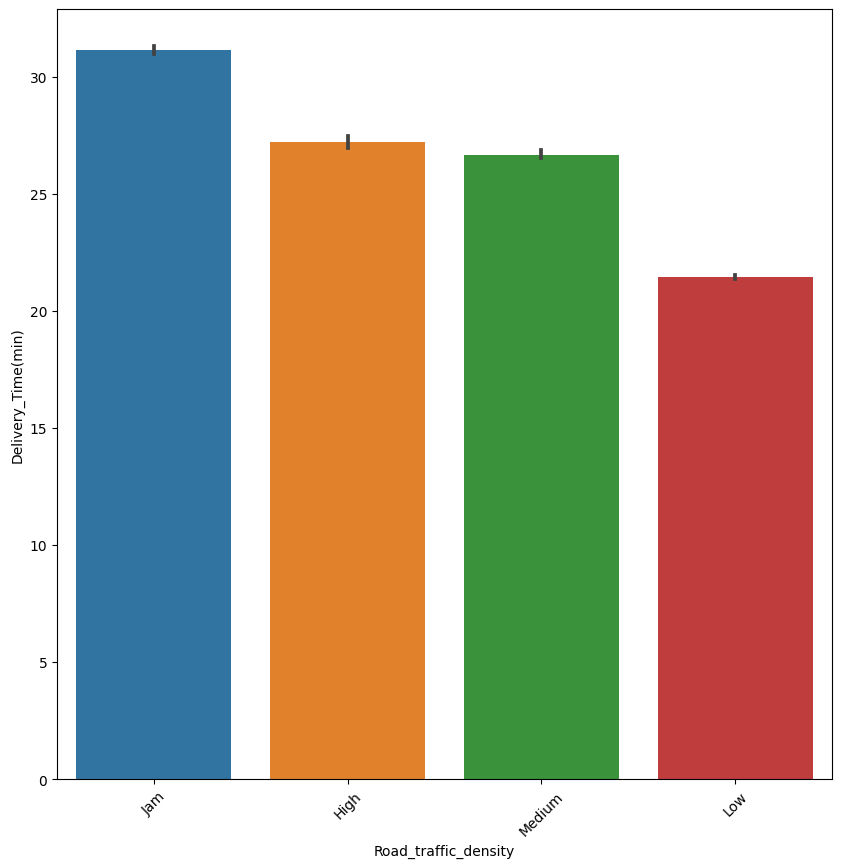

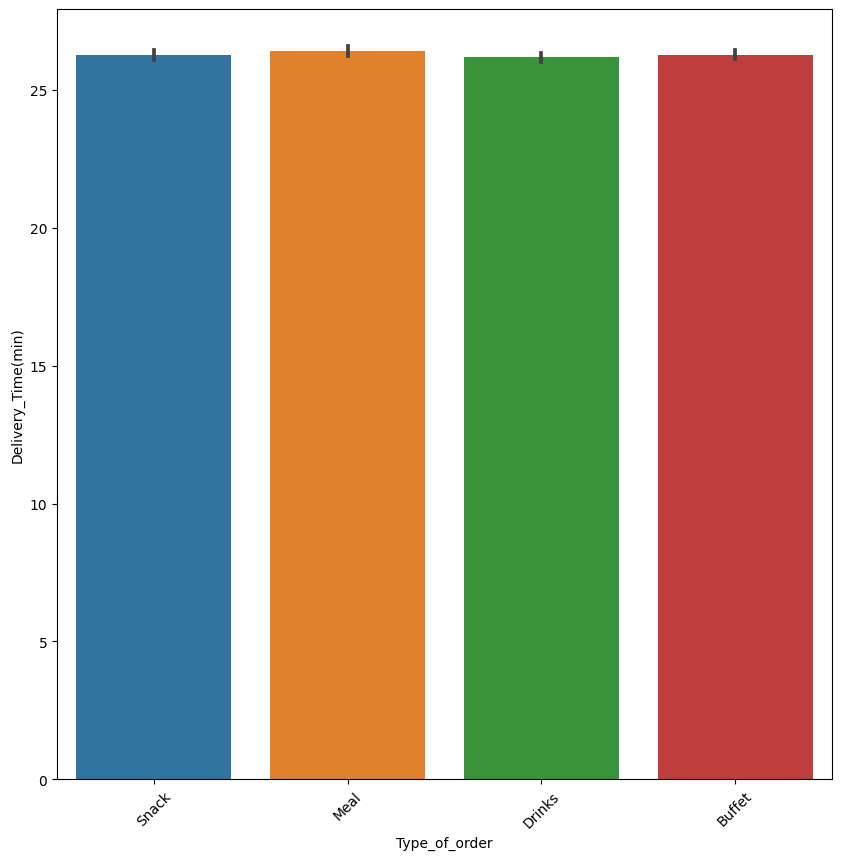

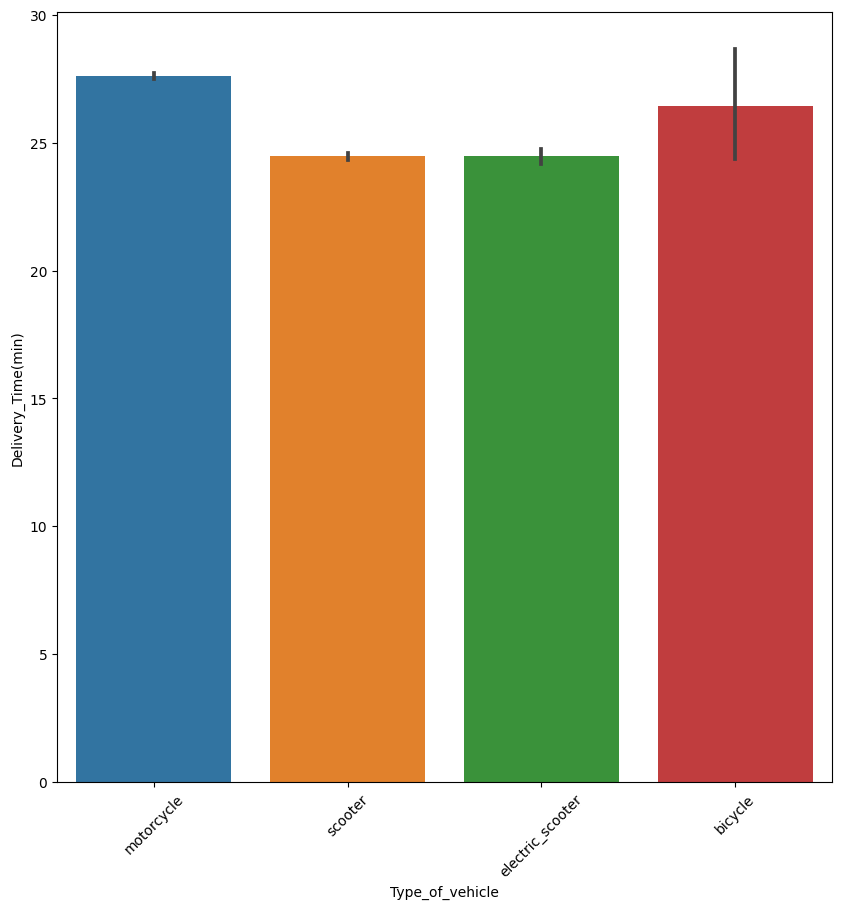

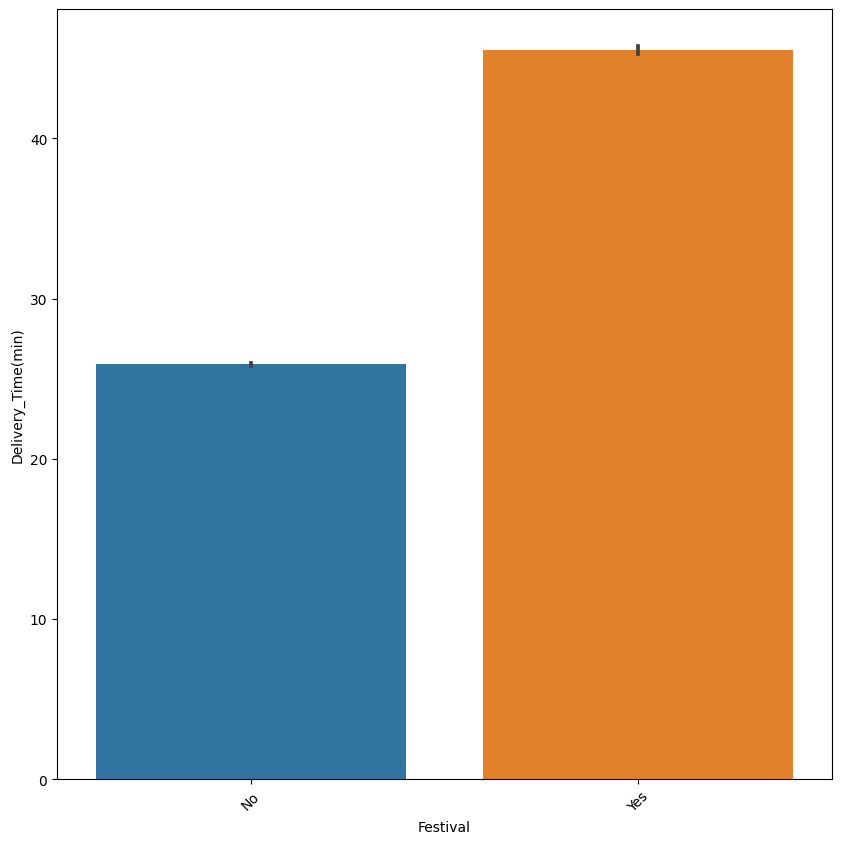

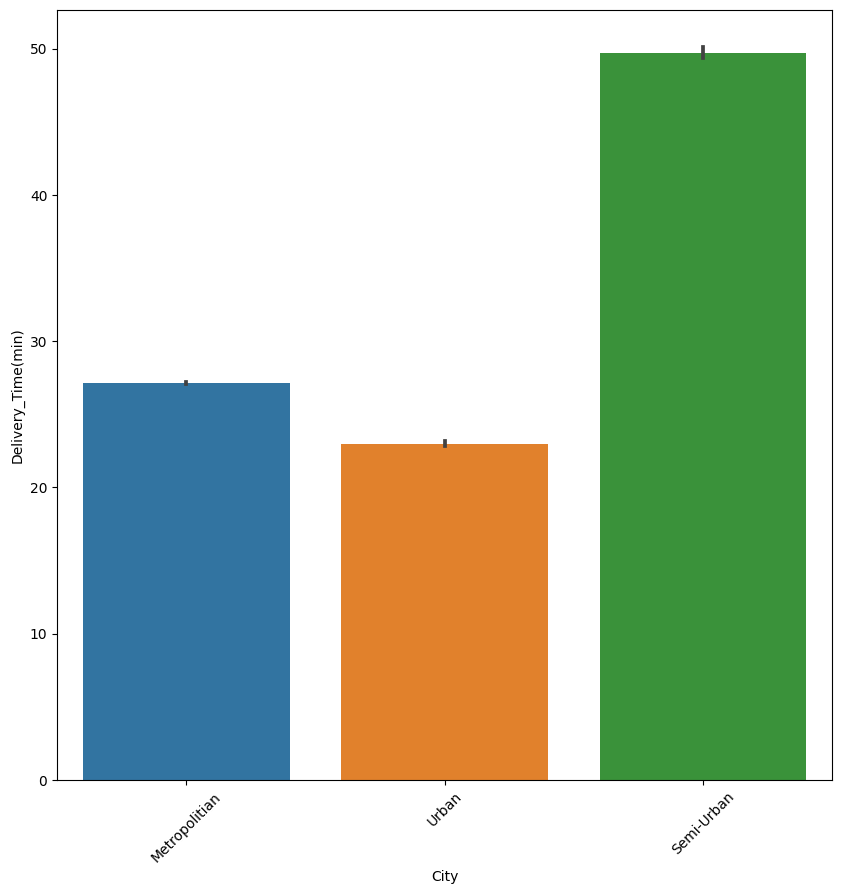

In [237]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Assuming you have a DataFrame 'data_copy' with 'delivery_time' and other all columns
for i in categorical_col :
    plt.figure(figsize=(10,10))
    sns.barplot(x=i , y="Delivery_Time(min)" , data = data_copy )
    plt.xticks(rotation=45)
    print('\n')
    plt.show()

# Identifying the relationship between dependent feature and independent feature 

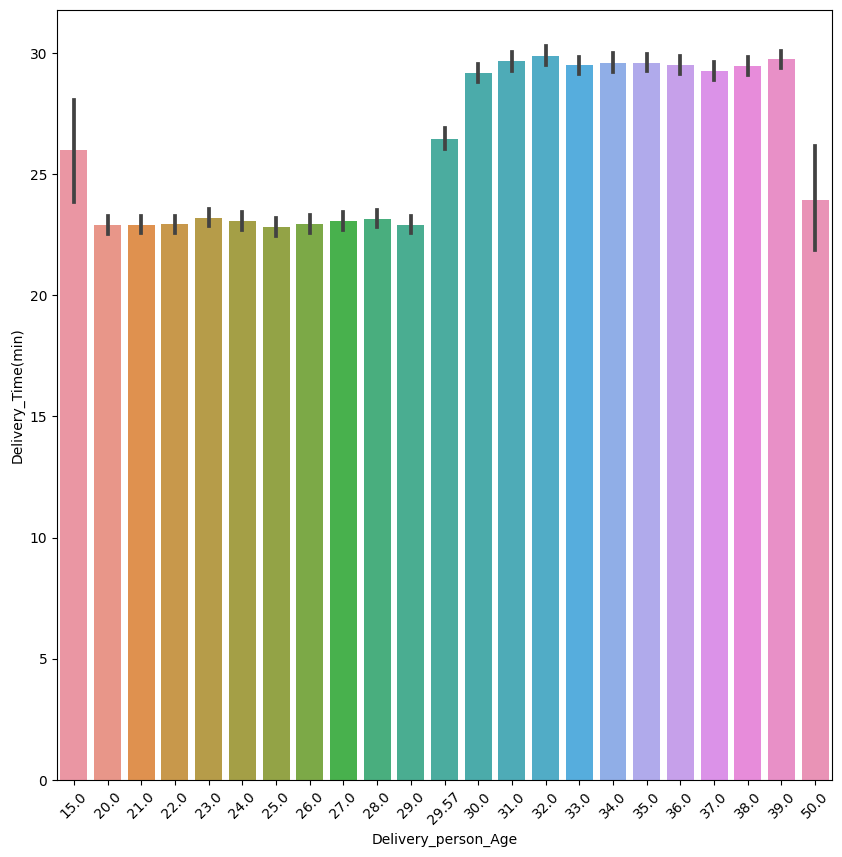

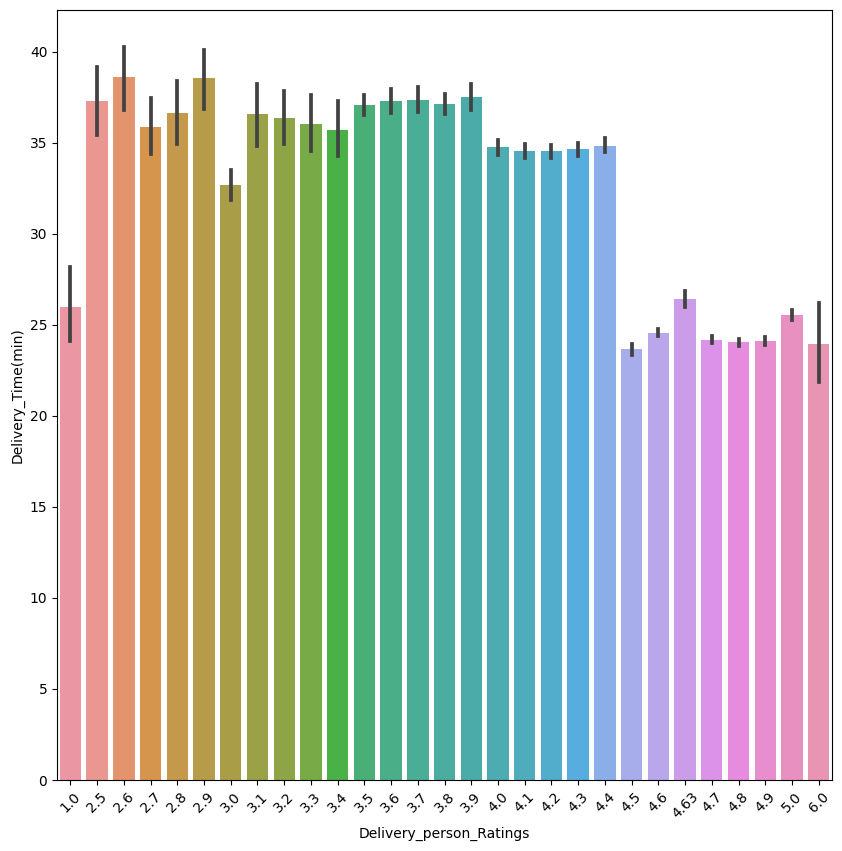

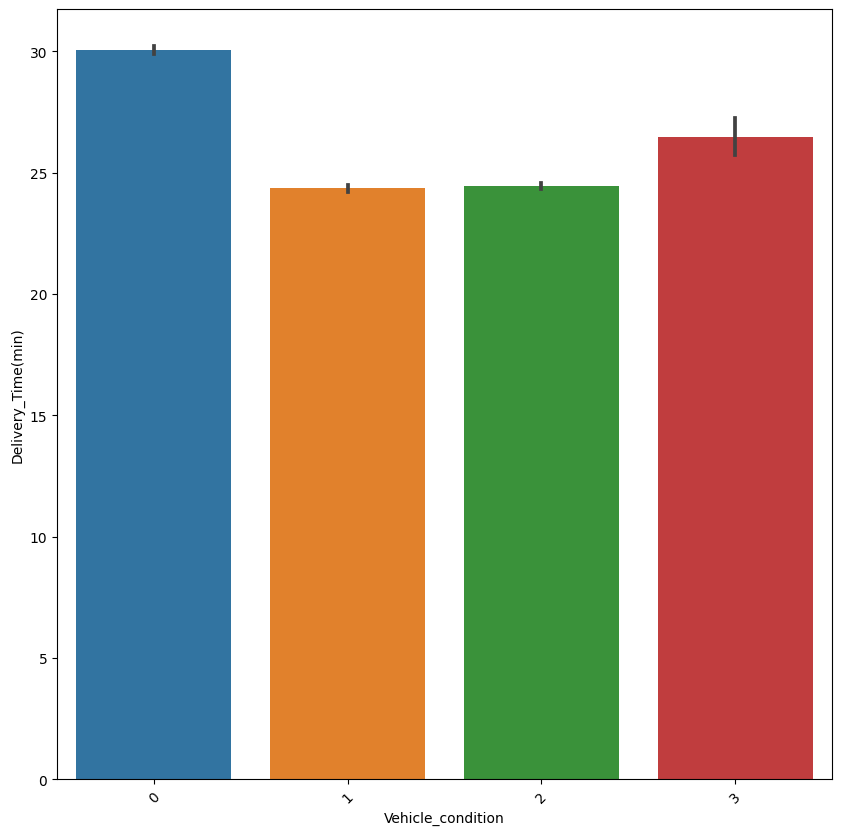

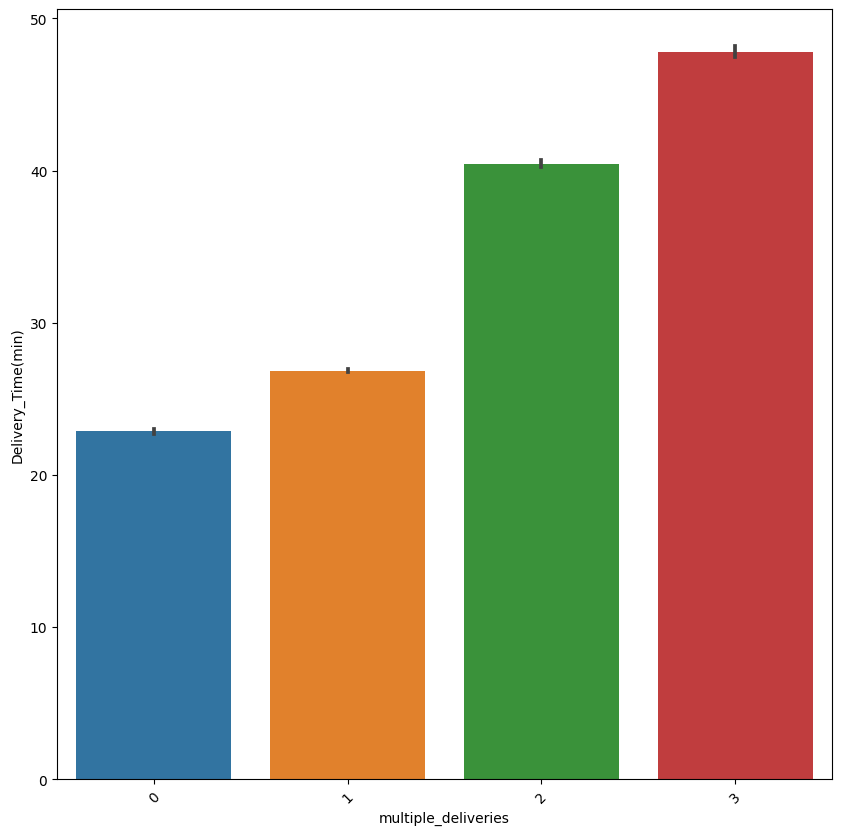

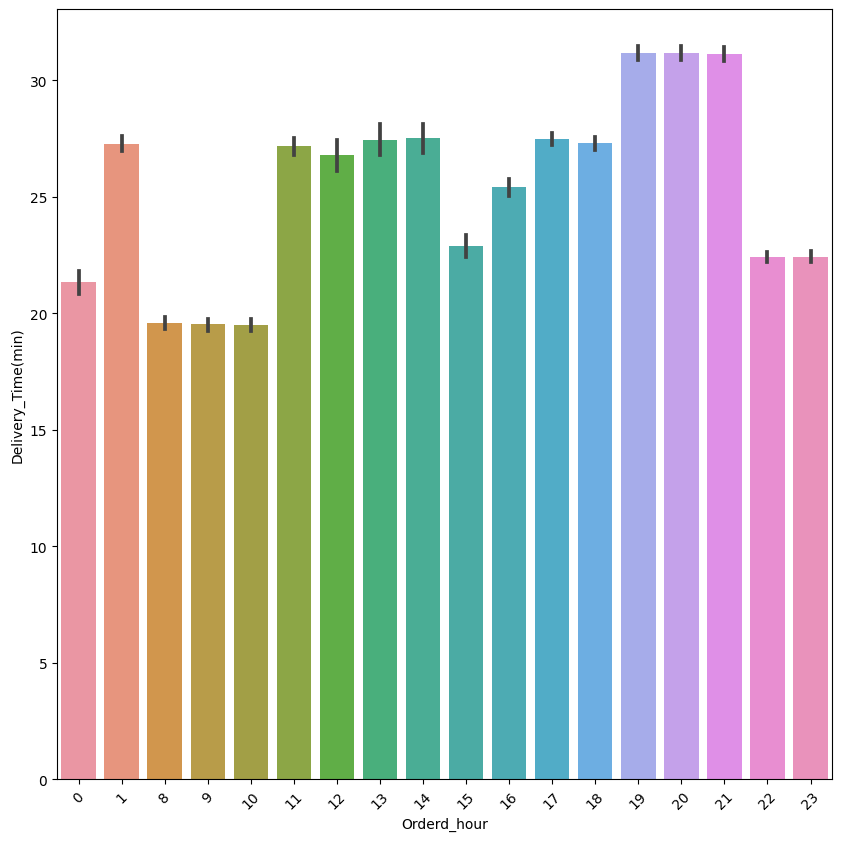

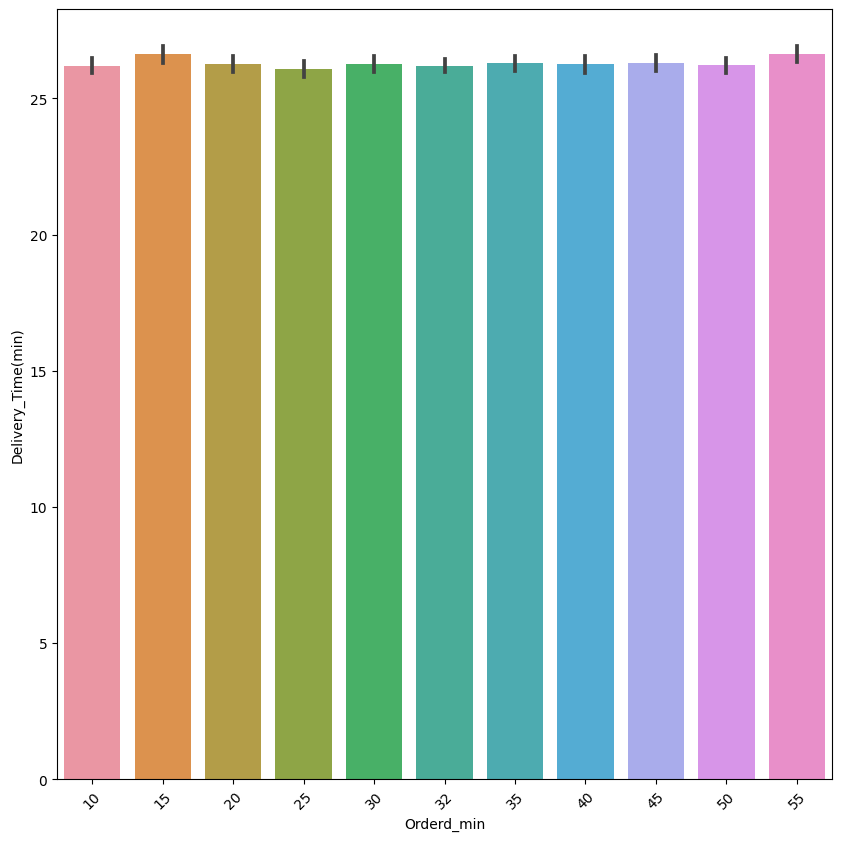

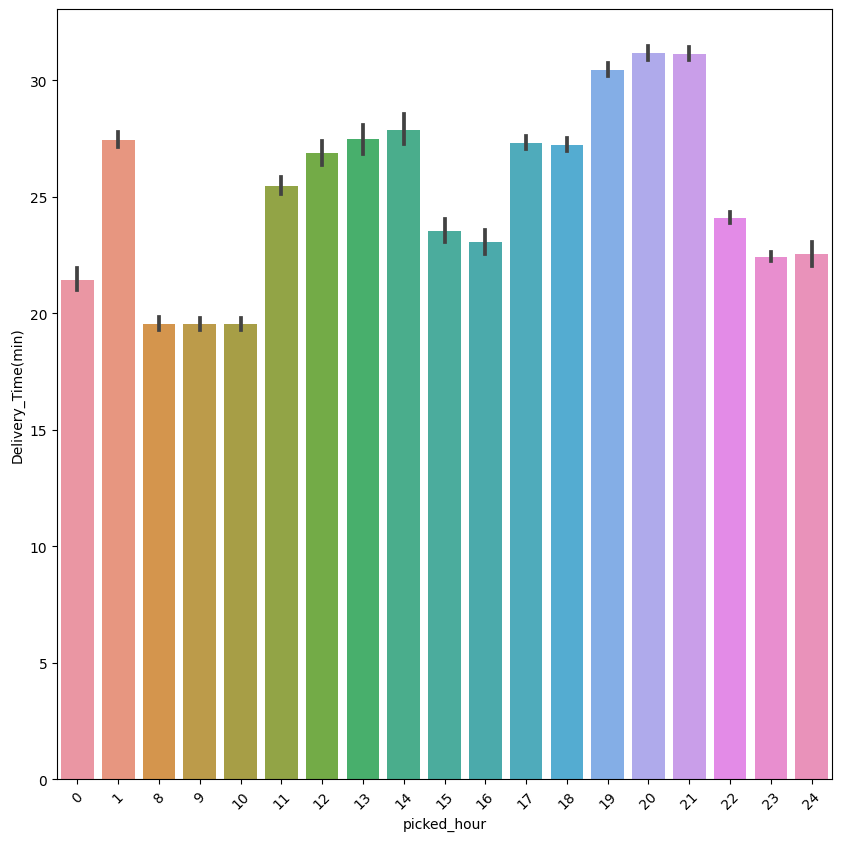

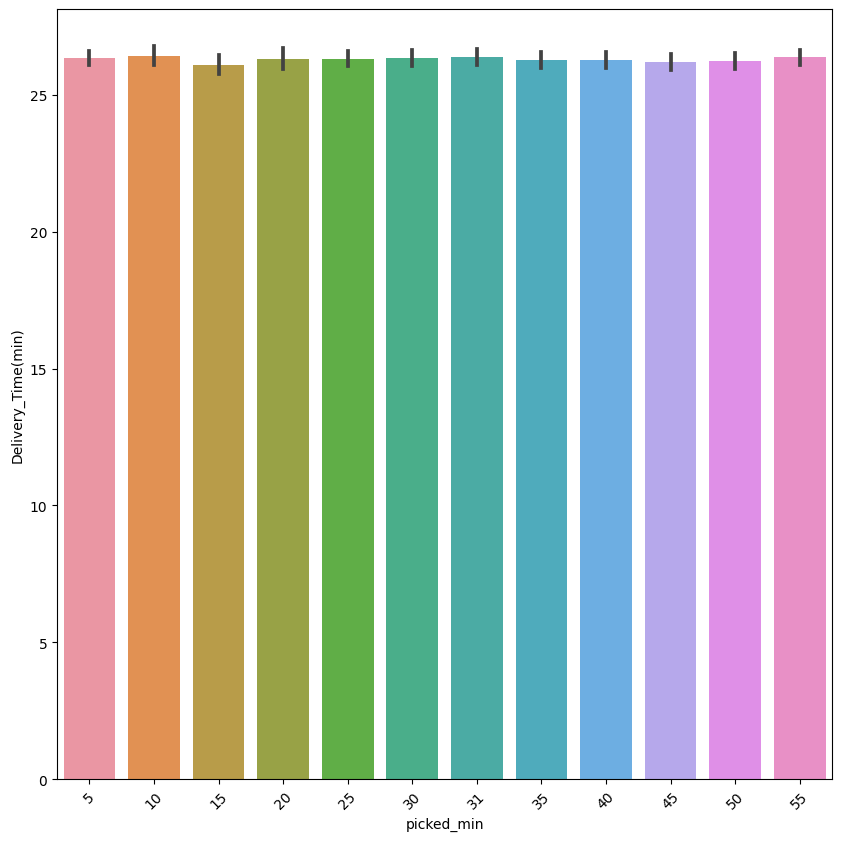

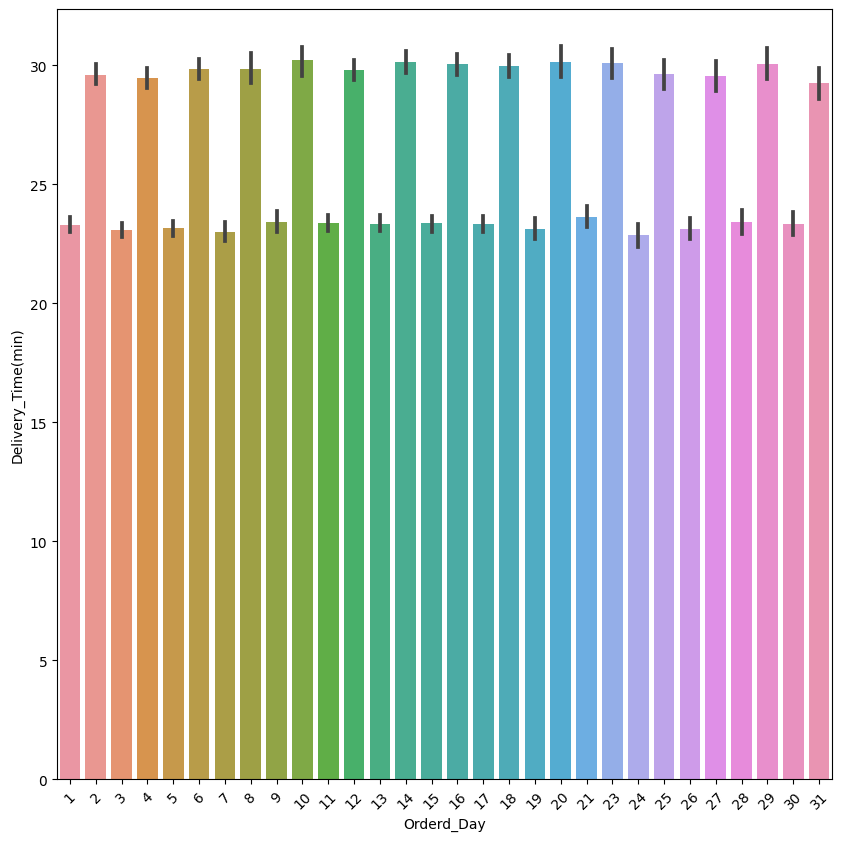

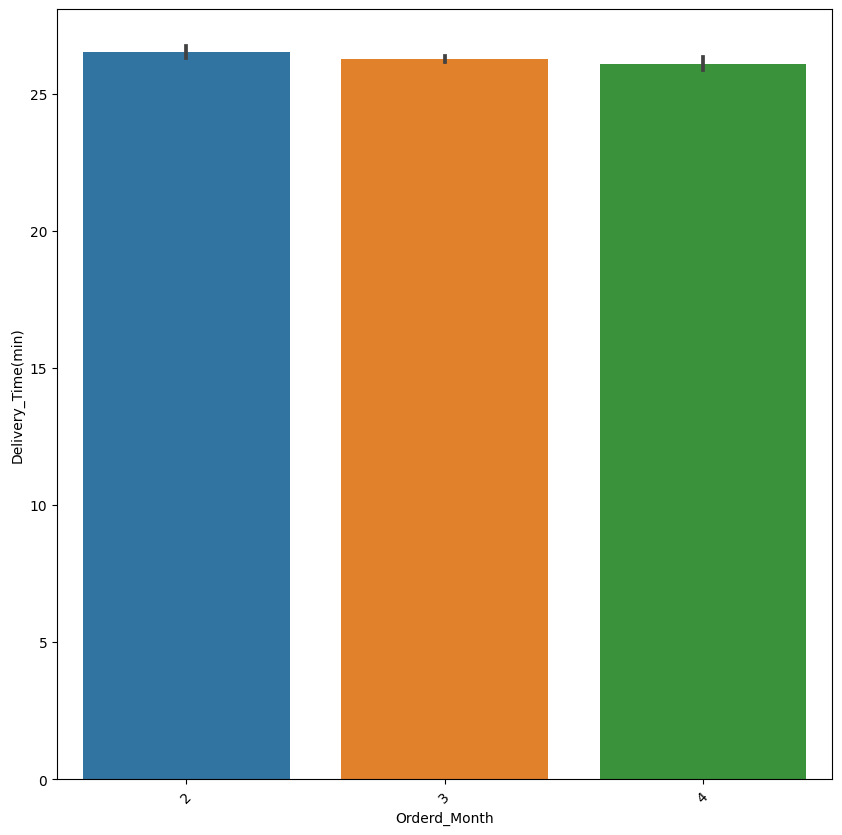

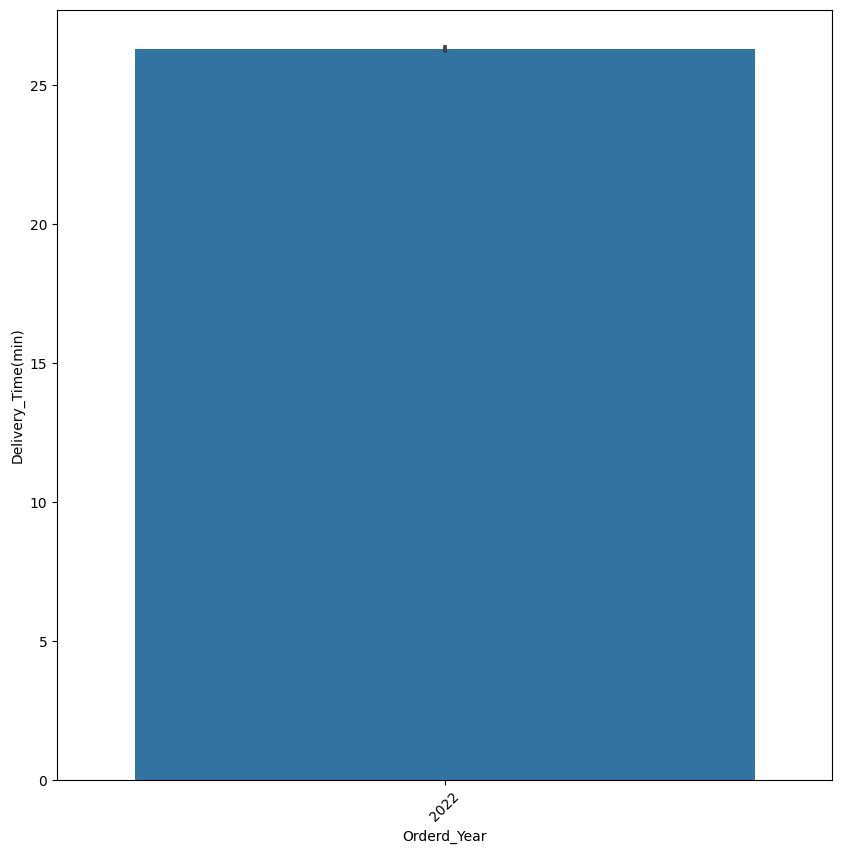

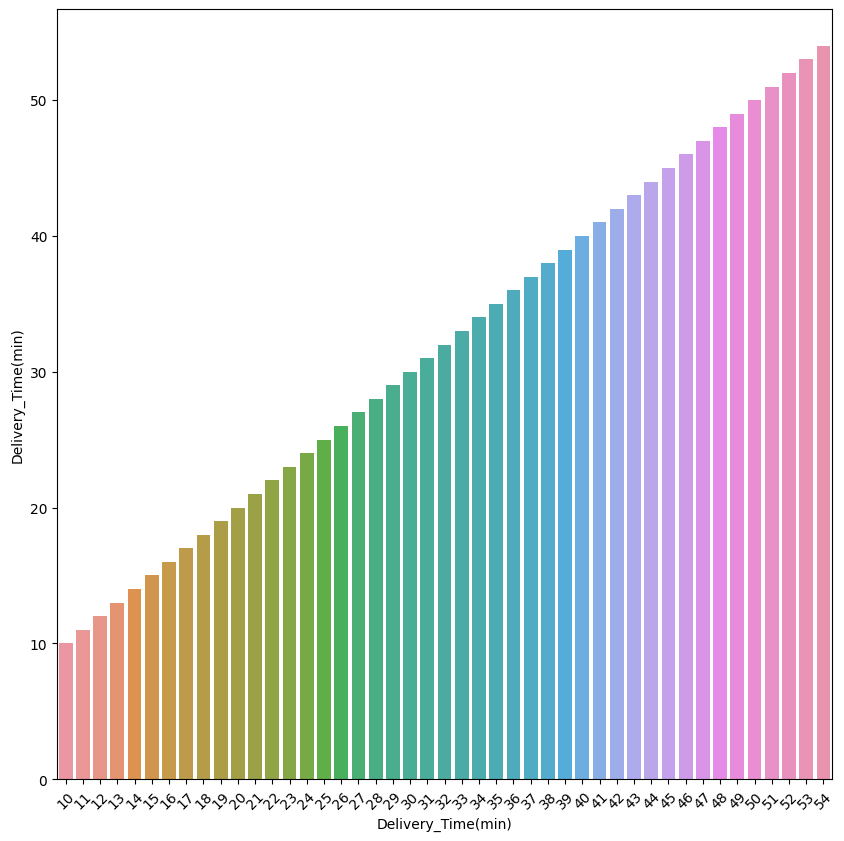

In [238]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Assuming you have a DataFrame 'data_copy' with 'delivery_time' and other all columns''
for i in data_copy :
    if data_copy[i].dtype != "O" and data_copy[i].nunique() < 50 :
        plt.figure(figsize=(10,10))
        sns.barplot(x=data_copy[i] , y="Delivery_Time(min)" , data = data_copy )
        plt.xticks(rotation=45)
        print('\n')
        plt.show()

# Identifying the relationship between dependent feature and independent feature 

In [239]:
data_copy.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Orderd_hour                    0
Orderd_min                     0
picked_hour                    0
picked_min                     0
Orderd_Day                     0
Orderd_Month                   0
Orderd_Year                    0
Delivery_Time(min)             0
dtype: int64

In [240]:
for i in data_copy :
    if data_copy[i].dtype == "O" :
        print("col_name --> :" ,  i  , ": unique_values -->" , data_copy[i].unique())

col_name --> : Weather_conditions : unique_values --> ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
col_name --> : Road_traffic_density : unique_values --> ['Jam' 'High' 'Medium' 'Low']
col_name --> : Type_of_order : unique_values --> ['Snack' 'Meal' 'Drinks' 'Buffet']
col_name --> : Type_of_vehicle : unique_values --> ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
col_name --> : Festival : unique_values --> ['No' 'Yes']
col_name --> : City : unique_values --> ['Metropolitian' 'Urban' 'Semi-Urban']


In [241]:
# Here we are just finding the unique values and assigning the rank to those values 
Weather_conditions_map = {'Fog' : 5  , 'Stormy'  : 2 ,'Sandstorms' : 3, 'Windy' : 4 , 'Cloudy'  : 6 , 'Sunny' : 1 }
Road_traffic_density_map = {'Jam' : 4 , 'High' : 3,'Medium' : 2 ,'Low' : 1 }
Type_of_order_map = {'Snack' : 1 , 'Meal' : 1 , 'Drinks' : 1 , 'Buffet' : 1}
Type_of_vehicle_map = {'motorcycle': 4, 'scooter' : 2 , 'electric_scooter' : 1 , 'bicycle' : 3}
Festival_map = {'No' : 0 , 'Yes' : 1 }
City_map = {'Metropolitian': 1 , 'Urban' : 2 , 'Semi-Urban' : 3 }

In [242]:
# mapping all the categorical features manually with some ranks 
data_copy['Weather_conditions'] = data_copy['Weather_conditions'].map(Weather_conditions_map)
data_copy['Road_traffic_density'] = data_copy['Road_traffic_density'].map(Road_traffic_density_map)
data_copy['Type_of_order'] = data_copy['Type_of_order'].map(Type_of_order_map)
data_copy['Type_of_vehicle'] = data_copy['Type_of_vehicle'].map(Type_of_vehicle_map)
data_copy['Festival'] = data_copy['Festival'].map(Festival_map)
data_copy['City'] = data_copy['City'].map(City_map)


In [243]:
# here you can see we have changed all the categorical fetures into numeric values 
data_copy

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year,Delivery_Time(min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,5,4,2,1,...,0,1,21,55,22,10,12,2,2022,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2,3,1,1,...,0,1,14,55,15,5,13,2,2022,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,3,2,1,1,...,0,1,17,30,17,40,4,3,2022,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,3,1,0,1,...,0,1,9,20,9,30,13,2,2022,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,5,4,1,1,...,0,1,19,50,20,5,14,2,2022,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,4,3,1,1,...,0,1,11,35,11,45,24,3,2022,32
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,4,4,0,1,...,0,1,19,55,20,10,16,2,2022,36
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,6,1,1,1,...,0,1,23,50,24,5,11,3,2022,16
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,6,3,0,1,...,0,1,13,35,13,40,7,3,2022,26


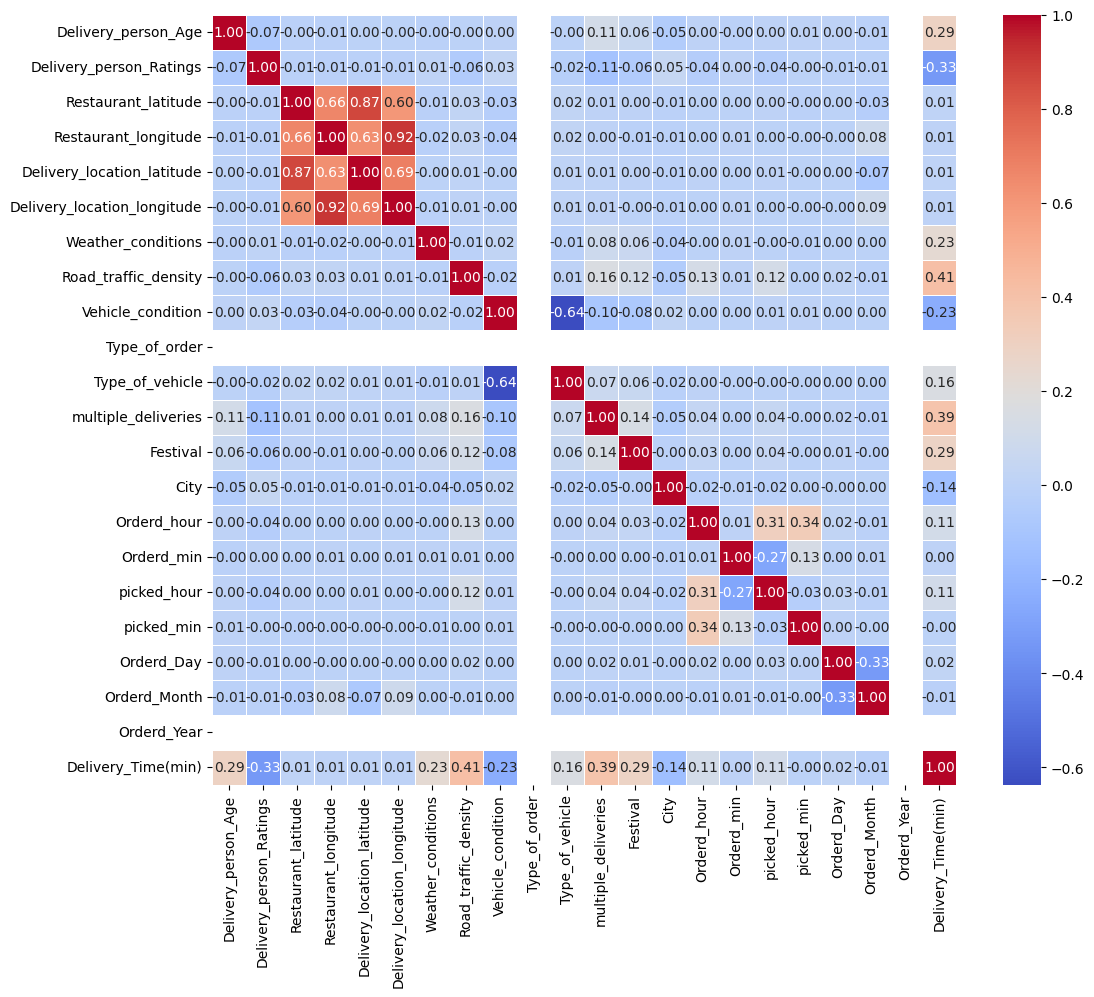

In [249]:
# getting the correlation 
plt.figure(figsize=(12, 10))  # You can adjust the size based on your preferences
sns.heatmap(data_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [250]:
# Here we have done our proper EDA and all 
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45584 non-null  float64
 1   Delivery_person_Ratings      45584 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           45584 non-null  int64  
 7   Road_traffic_density         45584 non-null  int64  
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  int64  
 10  Type_of_vehicle              45584 non-null  int64  
 11  multiple_deliveries          45584 non-null  int32  
 12  Festival                     45584 non-null  int64  
 13  City            

In [251]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [252]:
# see the difference 
data_copy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Orderd_hour,Orderd_min,picked_hour,picked_min,Orderd_Day,Orderd_Month,Orderd_Year,Delivery_Time(min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,5,4,2,1,...,0,1,21,55,22,10,12,2,2022,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2,3,1,1,...,0,1,14,55,15,5,13,2,2022,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,3,2,1,1,...,0,1,17,30,17,40,4,3,2022,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,3,1,0,1,...,0,1,9,20,9,30,13,2,2022,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,5,4,1,1,...,0,1,19,50,20,5,14,2,2022,41
